Team ID : PNT2022TMID46690

# Understanding The Data

### Importing the required libraries

In [47]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

### Loading the data

In [48]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [49]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Analyzing the data

In [50]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [51]:
y_train[0]

5

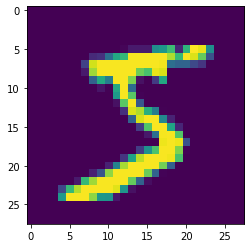

In [52]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])


### Reshaping the data

In [53]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

### Applying One Hot Encoding

In [54]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Model Building

In [ ]:
model = Sequential()

### Add CNN Layers

In [57]:
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation ='softmax'))

### Compiling the Model

In [58]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

### Train the Model

In [59]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.2609 - accuracy: 0.9500 - val_loss: 0.0936 - val_accuracy: 0.9703
Epoch 2/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0723 - accuracy: 0.9775 - val_loss: 0.0916 - val_accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0495 - accuracy: 0.9840 - val_loss: 0.0861 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.1267 - val_accuracy: 0.9714
Epoch 5/5
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.1045 - val_accuracy: 0.9781


### Observing the Metrics

In [62]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.10448186099529266, 0.9781000018119812]


### Test the Model

In [ ]:
from keras.models import load_model
import matplotlib.pyplot as plt

In [64]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Observing the Metrics

In [65]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy)): ")
print(metrics)

Metrics(Test loss & Test Accuracy)): 
[0.10448186099529266, 0.9781000018119812]


### Test the Model

In [66]:
prediction= model.predict(X_test[:4])
print(prediction)

[[4.64307141e-14 9.41230704e-18 4.35460451e-14 2.37232678e-10
  8.19107247e-18 1.01514965e-18 5.26431904e-26 1.00000000e+00
  2.99863284e-14 1.21474001e-12]
 [1.10410819e-10 2.67242872e-09 9.99998212e-01 1.56112367e-08
  1.33440385e-15 1.30546174e-17 1.79986603e-06 1.23274669e-17
  3.49710122e-11 2.44014946e-19]
 [4.22704433e-13 9.99994636e-01 1.11693601e-06 1.44851945e-13
  3.41596440e-09 1.15770497e-10 8.58048840e-11 1.36920466e-08
  4.30813316e-06 1.51135549e-10]
 [1.00000000e+00 4.40986330e-17 2.06547930e-12 1.14893435e-17
  5.04777020e-14 1.04432565e-11 4.01654855e-11 6.38017905e-13
  2.91141694e-11 8.11927470e-10]]


### Saving the Model

In [67]:
model.save('models/mnistCNN.h5')

### Test with saved model

In [38]:
from tensorflow.keras.models import load_model
model = load_model(r'C:/Users/afree/Hand written recognition System/models/mnistCNN.h5')
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

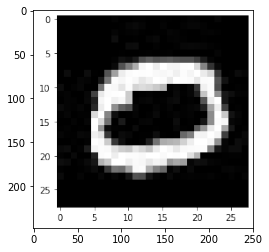

In [39]:
img=Image.open('img_1.png')
plt.imshow(img)

In [40]:
for index in range(1,2):
    img=Image.open('img_'+str(index)+'.png').convert("L")
    img = img.resize((28,28))
    im2arr=np.array(img)
    im2arr = im2arr.reshape(1,28,28,1)
    y_pred = model.predict(im2arr)
    print(f"The img_{index} predicted as value {np.argmax(y_pred)}")

The img_1 predicted as value 0
